In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("final_data.csv")
data = data.iloc[:, 1:]
data.head()

,Bidding Exercise,Year,Quota,Quota Premium,Total Bids Received,Number of Successful Bids,Previous,Total Labour Force (Thousand),Median Income (50th Percentile)
0,December 2022 Bidding Exercise,2022,465.5,88255.0,617.0,463.0,88912.0,3754.0,5070.0
1,November 2022 Bidding Exercise,2022,459.5,88912.0,654.5,452.0,80795.0,3754.0,5070.0
2,October 2022 Bidding Exercise,2022,561.5,80795.0,719.0,559.5,85000.0,3754.0,5070.0
3,September 2022 Bidding Exercise,2022,549.5,85000.0,741.0,531.0,83944.5,3754.0,5070.0
4,August 2022 Bidding Exercise,2022,552.5,83944.5,762.0,546.0,78450.0,3754.0,5070.0


In [3]:
from bs4 import BeautifulSoup
import requests
url_link = "https://data.worldbank.org/indicator/NY.GDP.PCAP.KD.ZG?locations=SG&start=2002"
result = requests.get(url_link).text
doc = BeautifulSoup(result, "html.parser")
print(doc.prettify())

<!DOCTYPE html>
<html data-react-checksum="-1580544971" data-reactid="1" data-reactroot="">
 <head data-reactid="2">
  <meta charset="utf-8" data-reactid="3"/>
  <title data-react-helmet="true" data-reactid="4">
   GDP per capita growth (annual %) - Singapore | Data
  </title>
  <meta content="width=device-width, initial-scale=1, minimal-ui" data-reactid="5" name="viewport"/>
  <meta content="IE=Edge" data-reactid="6" http-equiv="X-UA-Compatible"/>
  <meta content="GDP per capita growth (annual %) - Singapore from The World Bank: Data" data-react-helmet="true" data-reactid="7" name="description"/>
  <link data-reactid="8" href="/favicon.ico?v=1.1" rel="shortcut icon"/>
  <meta content="ByFDZmo3VoJURCHrA3WHjth6IAISYQEbe20bfzTPCPo" data-reactid="9" name="google-site-verification"/>
  <meta content="World Bank Open Data" data-reactid="10" property="og:title"/>
  <meta content="Free and open access to global development data" data-reactid="11" property="og:description"/>
  <meta content="h

In [4]:
gdp_per_capita_data = pd.read_csv("gdp_per_capita_data.csv", header = None)

gdp_per_capita_data = gdp_per_capita_data.iloc[:2, :].drop(gdp_per_capita_data.columns[6], axis=1)

gdp_per_capita_data = gdp_per_capita_data.transpose()

gdp_per_capita_data[1:]

gdp_per_capita_data.columns = ['Year', 'GDP per capita (current USD)']

gdp_per_capita_data = gdp_per_capita_data.drop(gdp_per_capita_data.index[0])

gdp_per_capita_data.head()

,Year,GDP per capita (current USD)
1,2002.0,22160.0
2,2003.0,23730.0
3,2004.0,27608.0
4,2005.0,29961.0
5,2006.0,33768.0


In [5]:
gdp_per_capita_data['GDP per capita (current USD)'] = gdp_per_capita_data['GDP per capita (current USD)'].astype('int64')

final_data = data.merge(gdp_per_capita_data, how = "left", on = "Year")

final_data.head()

,Bidding Exercise,Year,Quota,Quota Premium,Total Bids Received,Number of Successful Bids,Previous,Total Labour Force (Thousand),Median Income (50th Percentile),GDP per capita (current USD)
0,December 2022 Bidding Exercise,2022,465.5,88255.0,617.0,463.0,88912.0,3754.0,5070.0,82808
1,November 2022 Bidding Exercise,2022,459.5,88912.0,654.5,452.0,80795.0,3754.0,5070.0,82808
2,October 2022 Bidding Exercise,2022,561.5,80795.0,719.0,559.5,85000.0,3754.0,5070.0,82808
3,September 2022 Bidding Exercise,2022,549.5,85000.0,741.0,531.0,83944.5,3754.0,5070.0,82808
4,August 2022 Bidding Exercise,2022,552.5,83944.5,762.0,546.0,78450.0,3754.0,5070.0,82808


In [6]:
from sklearn import linear_model

regr = linear_model.LinearRegression()

final_data = final_data.dropna()

X = final_data[['Quota', 'Previous', 'Total Labour Force (Thousand)', 'Median Income (50th Percentile)', 'GDP per capita (current USD)']]
Y = final_data['Quota Premium']

regr.fit(X, Y)

print(regr.coef_)

[-1.80881003  0.9421929  -1.19411891 -0.1538281   0.07083456]


In [7]:
import statsmodels.api as sm
X1 = sm.add_constant(X)
result = sm.OLS(Y, X1).fit()

print(result.rsquared)
print(result.rsquared_adj)

0.9738773108982004
0.9733019212704075


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(
  X, Y, random_state=104,test_size=0.2, shuffle=True)

model = LinearRegression().fit(X_train,y_train)
y_pred = model.predict(X_test)

print(mean_squared_error(y_test,y_pred))

print(r2_score(y_test, y_pred))

9405544.3250574
0.9792369931880384


Text(0.5, 0, 'Permutation Importance')

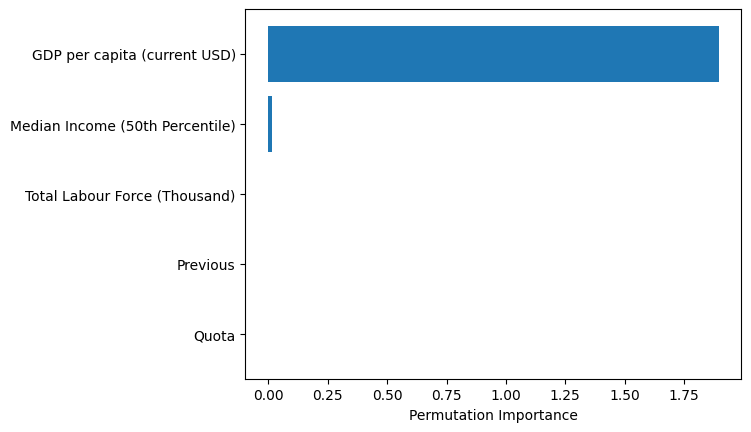

In [9]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

perm_importance = permutation_importance(rf, X_test, y_test)

sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(['Quota', 'Previous', 'Total Labour Force (Thousand)', 'Median Income (50th Percentile)', 'GDP per capita (current USD)'], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [10]:
predictions = rf.predict(X_test)
predictions

array([45752.31 , 65451.35 , 47179.925, 65821.765, 45151.055, 72626.765,
       43261.645, 52084.495, 52355.41 , 34285.76 , 40579.805, 73488.635,
       24808.625, 13976.315, 78949.685, 26565.405, 24918.415, 55491.905,
       11100.18 , 15266.74 , 27529.695, 27134.62 ,  7004.52 , 70701.28 ,
       50511.78 , 17564.285, 52333.415, 43459.245, 13973.485, 34090.495,
       38056.84 , 61642.655, 44290.495, 43882.5  , 57004.98 , 13840.39 ,
       71612.315, 16196.075, 32506.495, 15588.065, 64331.305, 17544.44 ,
       21195.51 , 64524.905, 11981.45 , 53859.63 , 27550.935])

In [11]:
pd.api.types.is_datetime64_any_dtype(final_data['Year'])

False

In [16]:
m = 20
alpha = 1/(2*m)

In [28]:
final_data['Year'] = pd.to_datetime(final_data['Year'])

In [29]:
final_data

,Bidding Exercise,Year,Quota,Quota Premium,Total Bids Received,Number of Successful Bids,Previous,Total Labour Force (Thousand),Median Income (50th Percentile),GDP per capita (current USD)
0,December 2022 Bidding Exercise,2022-01-01,465.5,88255.0,617.0,463.0,88912.0,3754.0,5070.0,82808
1,November 2022 Bidding Exercise,2022-01-01,459.5,88912.0,654.5,452.0,80795.0,3754.0,5070.0,82808
2,October 2022 Bidding Exercise,2022-01-01,561.5,80795.0,719.0,559.5,85000.0,3754.0,5070.0,82808
3,September 2022 Bidding Exercise,2022-01-01,549.5,85000.0,741.0,531.0,83944.5,3754.0,5070.0,82808
4,August 2022 Bidding Exercise,2022-01-01,552.5,83944.5,762.0,546.0,78450.0,3754.0,5070.0,82808
...,...,...,...,...,...,...,...,...,...,...
240,July 2002 Bidding Exercise,2002-01-01,1117.0,31102.0,1768.5,1113.0,30789.0,2321.0,2380.0,22160
241,August 2002 Bidding Exercise,2002-01-01,1114.0,30789.0,1560.0,1107.5,29455.0,2321.0,2380.0,22160
242,September 2002 Bidding Exercise,2002-01-01,1116.5,29455.0,1311.5,1113.0,31046.0,2321.0,2380.0,22160
243,October 2002 Bidding Exercise,2002-01-01,1113.5,31046.0,1756.5,1105.5,29060.5,2321.0,2380.0,22160


In [30]:
# plotting data - matplotlib
from matplotlib import pyplot as plt
# time series - statsmodels 
# Seasonality decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose 
# holt winters 
# single exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing   
# double and triple exponential smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

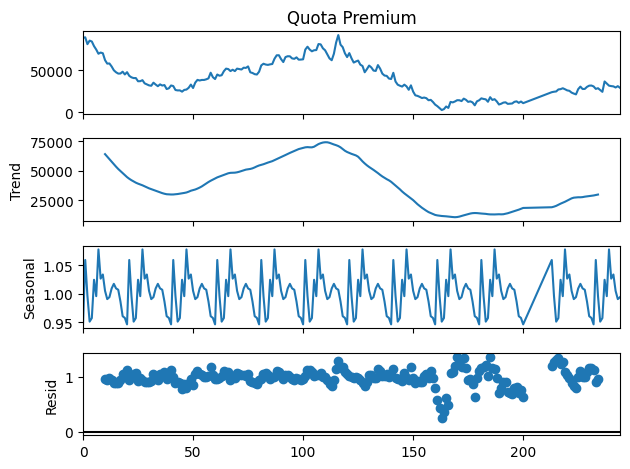

In [34]:
decompose_result = seasonal_decompose(final_data['Quota Premium'], period = 20, model='multiplicative')
decompose_result.plot()
plt.show()

C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


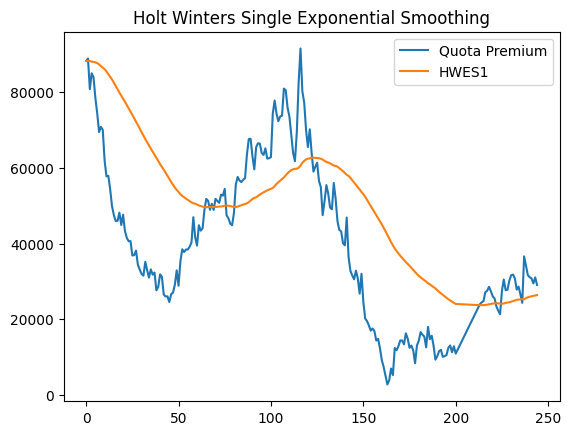

In [35]:
final_data['HWES1'] = SimpleExpSmoothing(final_data['Quota Premium']).fit(smoothing_level=alpha,optimized=False,use_brute=True).fittedvalues
final_data[['Quota Premium','HWES1']].plot(title='Holt Winters Single Exponential Smoothing');

C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


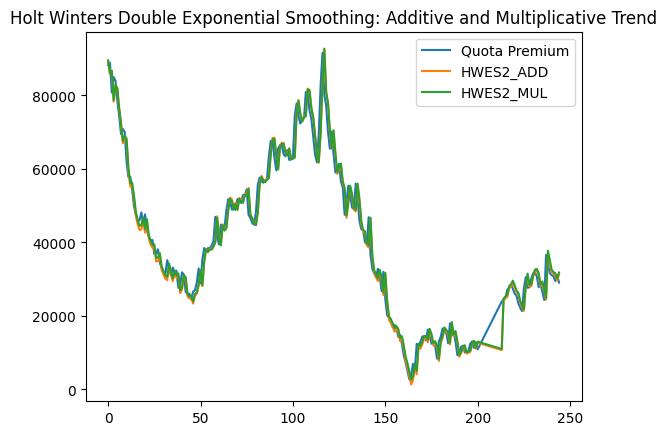

In [39]:
final_data['HWES2_ADD'] = ExponentialSmoothing(final_data['Quota Premium'],trend='add').fit().fittedvalues
final_data['HWES2_MUL'] = ExponentialSmoothing(final_data['Quota Premium'],trend='mul').fit().fittedvalues
final_data[['Quota Premium','HWES2_ADD','HWES2_MUL']].plot(title='Holt Winters Double Exponential Smoothing: Additive and Multiplicative Trend');

C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


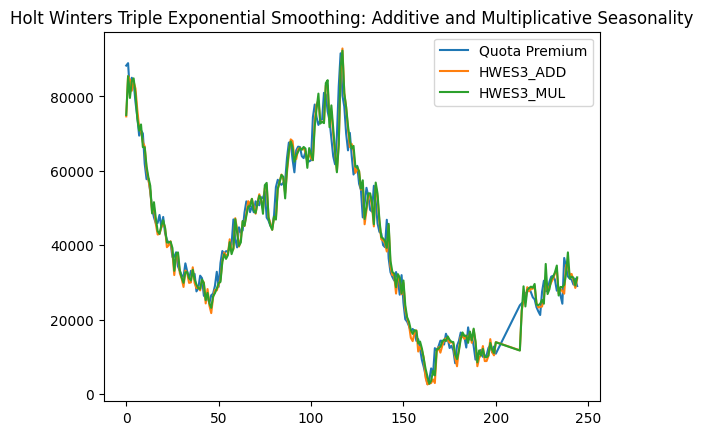

In [42]:
final_data['HWES3_ADD'] = ExponentialSmoothing(final_data['Quota Premium'],trend='add',seasonal='add',seasonal_periods=12).fit().fittedvalues
final_data['HWES3_MUL'] = ExponentialSmoothing(final_data['Quota Premium'],trend='mul',seasonal='mul',seasonal_periods=12).fit().fittedvalues
final_data[['Quota Premium','HWES3_ADD','HWES3_MUL']].plot(title='Holt Winters Triple Exponential Smoothing: Additive and Multiplicative Seasonality');

C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_pred

Text(0.5, 1.0, 'Train, Test and Predicted Test using Holt Winters')

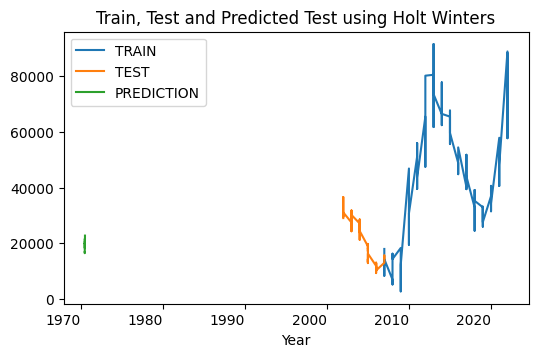

In [46]:
forecast_data = pd.read_csv('final_data.csv', index_col = 'Year', parse_dates = True)

train_premium = forecast_data[:186]
test_premium = forecast_data[186:]

fitted_model = ExponentialSmoothing(train_premium['Quota Premium'],trend='mul',seasonal='mul',seasonal_periods=12).fit()
test_predictions = fitted_model.forecast(12)
train_premium['Quota Premium'].plot(legend=True,label='TRAIN')
test_premium['Quota Premium'].plot(legend=True,label='TEST',figsize=(6,4))
test_predictions.plot(legend=True,label='PREDICTION')
plt.title('Train, Test and Predicted Test using Holt Winters')

C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\teomi\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_pred

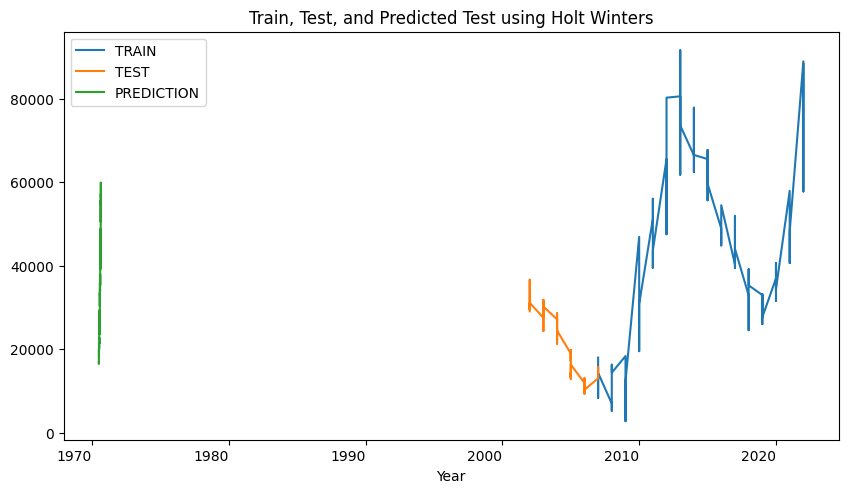

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Read the data with a datetime index
forecast_data = pd.read_csv('final_data.csv', index_col='Year', parse_dates=True)

# Split the data into train and test sets
train_premium = forecast_data[:186]
test_premium = forecast_data[186:]

# Fit the model on the training data
fitted_model = ExponentialSmoothing(train_premium['Quota Premium'], trend='mul', seasonal='mul', seasonal_periods=12).fit()

# Generate test predictions
test_predictions = fitted_model.forecast(len(test_premium))

# Plotting
plt.figure(figsize=(10, 6))
train_premium['Quota Premium'].plot(legend=True, label='TRAIN')
test_premium['Quota Premium'].plot(legend=True, label='TEST')
test_predictions.plot(legend=True, label='PREDICTION')
plt.title('Train, Test, and Predicted Test using Holt Winters')
plt.show()

In [50]:
test_predictions

186    16852.366613
187    16446.903753
188    18691.901233
189    20121.440519
190    18242.292208
191    21657.285466
192    19767.961950
193    20677.391760
194    20644.398347
195    20396.892400
196    20589.584512
197    22765.389583
198    21730.892168
199    21208.053454
200    24102.946455
201    25946.317465
202    23523.181876
203    27926.768146
204    25490.511772
205    26663.208853
206    26620.664305
207    26301.508832
208    26549.982629
209    29355.652981
210    28021.682964
211    27347.489720
212    31080.413949
213    33457.415208
214    30332.815594
215    36011.178793
216    32869.660110
217    34381.836673
218    34326.976071
219    33915.429530
220    34235.833033
221    37853.705898
222    36133.570129
223    35264.207326
224    40077.761158
225    43142.871194
226    39113.743486
227    46435.913790
228    42384.969178
229    44334.899806
230    44264.157824
231    43733.474288
232    44146.630144
233    48811.826845
234    46593.735715
235    45472.704481
